# Phase 2, Composite Space (verb + noun)

In this experiment, we use the results of a noun vector space to enhance a verb space. This is done by adding the similarity value of all similar terms of a given basis word. The similarity values are normalized so that the total value is no greater than 1. This distributes the meaning of the co-occurring word across all of its similar terms. 

### Load Data

In [1]:
import numpy as np
import pandas as pd
import collections, os, sys, random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tf.fabric import Fabric
from tf.extra.bhsa import Bhsa
from project_code.experiments import CompositeVerb, CompositeVerbSubObj, VerbExperiment1
from project_code.noun_experiments import NounExperiment1
from project_code.semspace import SemSpace

bhsa_data_paths=['~/github/etcbc/bhsa/tf/c',
                 '~/github/semantics/project_code/lingo/heads/tf/c']
TF = Fabric(bhsa_data_paths)
tf_api = TF.load('''
                function lex vs language
                pdp freq_lex gloss domain ls
                heads prep_obj mother rela
                typ sp st
              ''', silent=True)

tf_api.makeAvailableIn(globals())
B = Bhsa(api=tf_api, name='phase2_composite_space', version='c')

This is Text-Fabric 3.4.12
Api reference : https://github.com/Dans-labs/text-fabric/wiki/Api
Tutorial      : https://github.com/Dans-labs/text-fabric/blob/master/docs/tutorial.ipynb
Example data  : https://github.com/Dans-labs/text-fabric-data

116 features found and 0 ignored


**Documentation:** <a target="_blank" href="https://etcbc.github.io/bhsa" title="{provenance of this corpus}">BHSA</a> <a target="_blank" href="https://etcbc.github.io/bhsa/features/hebrew/c/0_home.html" title="{CORPUS} feature documentation">Feature docs</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/Bhsa" title="BHSA API documentation">BHSA API</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/api" title="text-fabric-api">Text-Fabric API 3.4.12</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/api#search-template-introduction" title="Search Templates Introduction and Reference">Search Reference</a>

#### Load the Noun Space

In [2]:
ne1 = NounExperiment1(tf_api=tf_api)
print(f'noun experiment with dim {ne1.data.shape} ready...')
ns1 = SemSpace(ne1, info=True)

noun experiment with dim (6357, 2744) ready...
  0.00s Applying association measure(s)...
   |     0.00s Applying PPMI...
   |     1.50s Finished PPMI...
  1.50s Building pairwise matrices...
   |     0.00s Building pairwise distances...
   |       28s Building pairwise similarities...
    34s space is ready!


#### Build Composite Experiment

In [3]:
indent(reset=True)
info('building composite experiment...')
ce1 = CompositeVerb(ns1.sim_pmi_normalized, tf_api=tf_api) 
info(f'composite experiment with dim {ce1.data.shape} ready...')

  0.00s building composite experiment...
 1m 23s composite experiment with dim (386904, 308) ready...


### Build Composite Space
This may take some time—about 7 minutes on a 2017 macbook pro.

In [4]:
cs1 = SemSpace(ce1, info=True)

  0.00s Applying association measure(s)...
   |     0.00s Applying PPMI...
   |       12s Finished PPMI...
    12s Building pairwise matrices...
   |     0.00s Building pairwise distances...
   |       25s Building pairwise similarities...
 1m 24s space is ready!


#### Space samples:

In [6]:
cs1.pmi['<BD[.qal'].sort_values(ascending=False).head(10)

Pred.Adju.B_<DH===/     7.266787
Pred.Adju.B_YLH/        7.266787
Pred.Adju.B_MXJJ>L/     7.266787
Pred.Adju.B_N<RH=/      7.266787
Pred.Adju.B_>HLJBMH/    7.266787
Pred.Adju.B_<JPH=/      7.266787
Pred.Objc.>T_MZLWT/     7.096730
Pred.Adju.B_R<B=/       7.045351
Pred.Objc.CBTJ/         6.951374
Pred.Adju.B_CB<NH/      6.817826
Name: <BD[.qal, dtype: float64

In [7]:
cs1.raw.index.unique()

Index(['PreO.Adju.<B/', 'PreO.Adju.<B=/', 'PreO.Adju.<BD/', 'PreO.Adju.<BD>/',
       'PreO.Adju.<BDH/', 'PreO.Adju.<BDJHW/', 'PreO.Adju.<BDT/',
       'PreO.Adju.<BDWN/', 'PreO.Adju.<BD[', 'PreO.Adju.<BD_>DWM/',
       ...
       'PtcO.Subj.ZQN==/', 'PtcO.Subj.ZQNH/', 'PtcO.Subj.ZQNJM/',
       'PtcO.Subj.ZR/', 'PtcO.Subj.ZR</', 'PtcO.Subj.ZR=/', 'PtcO.Subj.ZRBBL/',
       'PtcO.Subj.ZRC/', 'PtcO.Subj.ZRW</', 'PtcO.Subj.ZRX=/'],
      dtype='object', length=386904)

In [8]:
[i for i in cs1.raw.index.unique() if 'Subj' in i][:5]

['PreO.Subj.<B/',
 'PreO.Subj.<B=/',
 'PreO.Subj.<BD/',
 'PreO.Subj.<BD>/',
 'PreO.Subj.<BDH/']

## Visualize Space

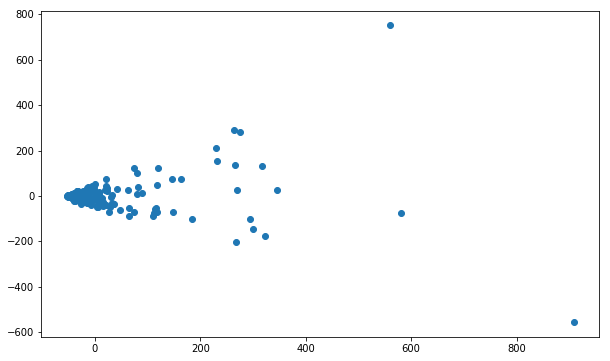

In [9]:
cs1.pmi_plot.show(annotate=False)

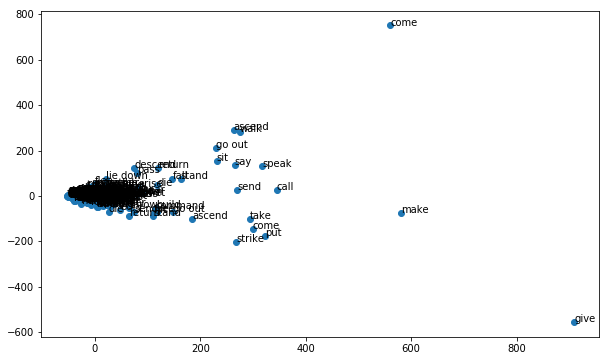

In [10]:
cs1.pmi_plot.show()

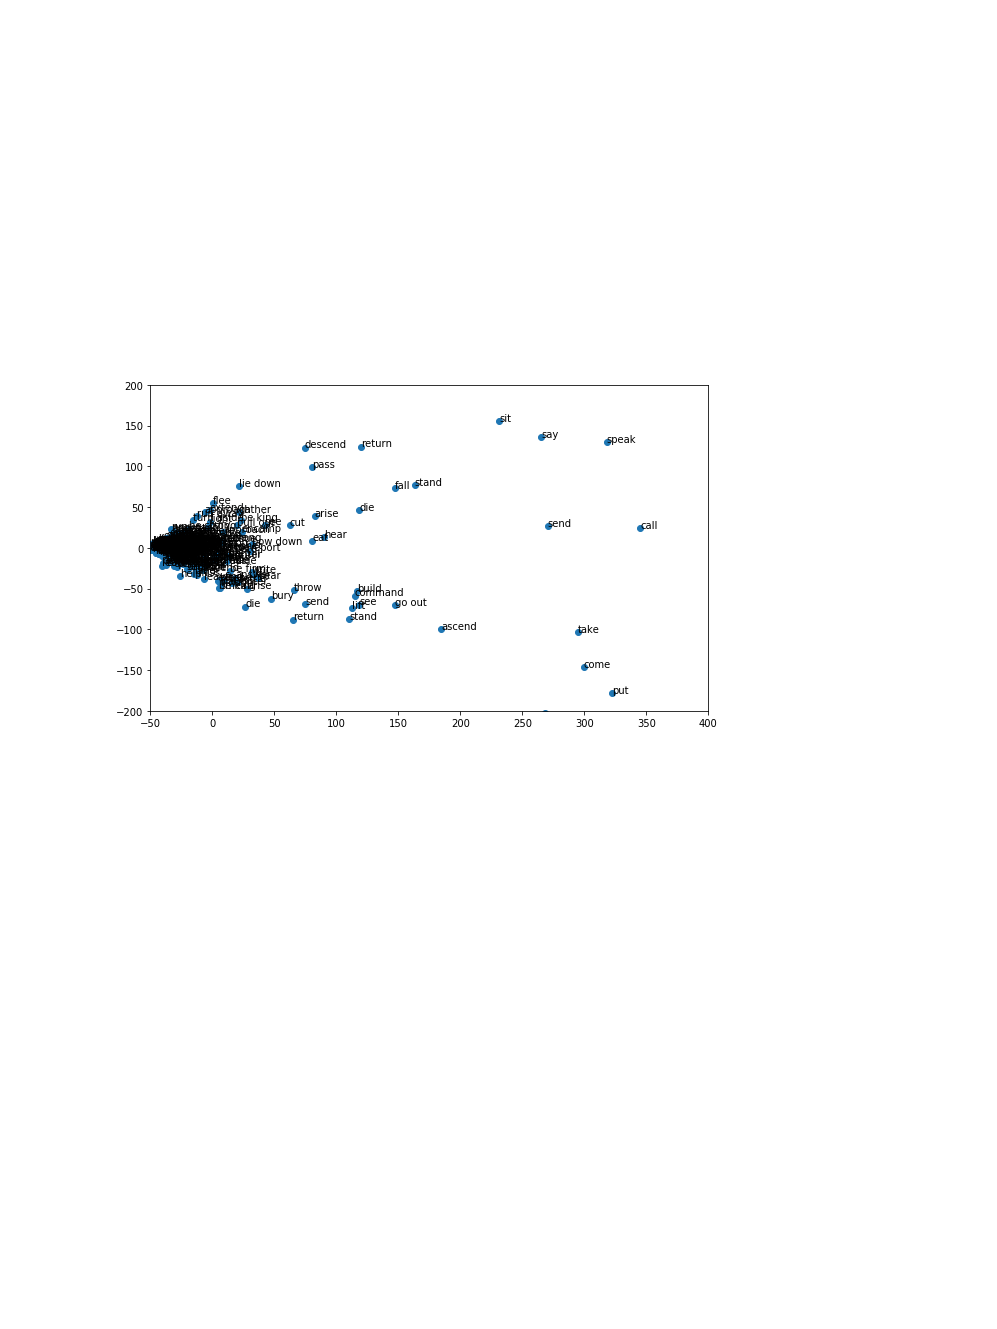

In [11]:
cs1.pmi_plot.show(axis=[-50, 400, -200, 200])

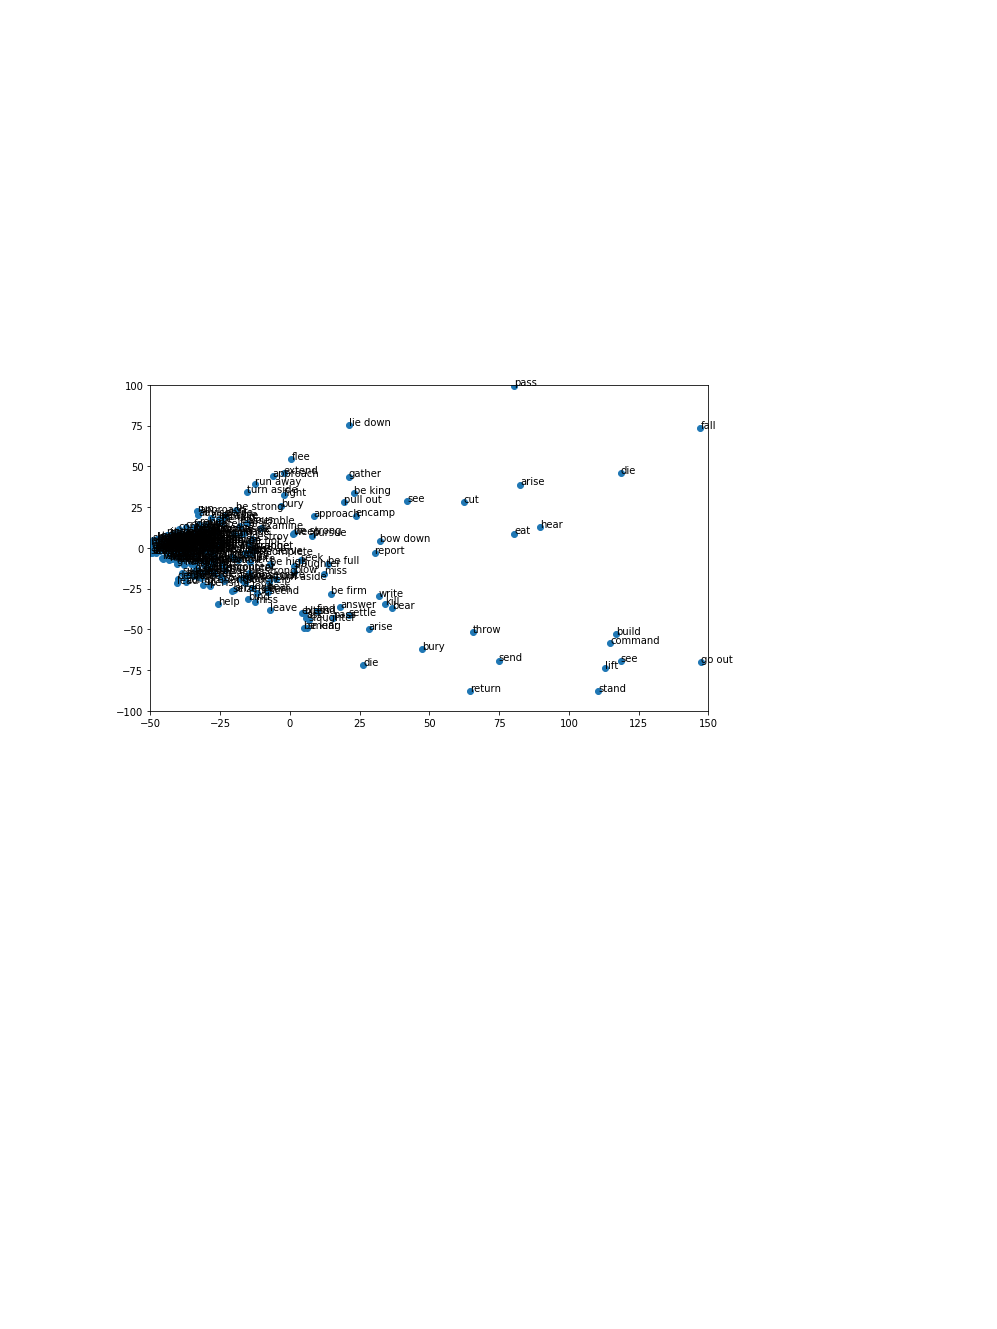

In [12]:
cs1.pmi_plot.show(axis=[-50, 150, -100, 100])

### Comparison with Unaugmented Space

Below I make comparisons between the non-noun enhanced space with the noun enhanced version. To do this, I simply print similarity scores for the top 10 verbs, and then a few for some random ones.

In [15]:
# build unaugmented space
ve1 = VerbExperiment1(tf_api=tf_api)
vs1 = SemSpace(ve1, info=True)

  0.00s Applying association measure(s)...
   |     0.00s Applying PPMI...
   |     0.45s Finished PPMI...
  0.45s Building pairwise matrices...
   |     0.00s Building pairwise distances...
   |     5.05s Building pairwise similarities...
  7.52s space is ready!


In [16]:
freq_sorted = cs1.raw.sum().sort_values(ascending=False).head(200)

In [17]:
freq_sorted.tail()

RXY[.qal     17.0
ZNH[.qal     17.0
J<Y[.nif     17.0
HLL[.piel    17.0
PG<[.qal     17.0
dtype: float64

In [137]:
for lex in freq_sorted.index[:10]:
    
    key = f'{lex} ({ce1.target2gloss[lex]})'
    
    print(f'unaugmented verb space, {lex}:')
    print(vs1.similarity_pmi[key].sort_values(ascending=False).head(10))
    print()
    print(f'augmented verb space, {lex}:')
    print(cs1.similarity_pmi[key].sort_values(ascending=False).head(10))
    print('\n', '-'*30, '\n')

unaugmented verb space, >MR[.qal:
>MR[.qal (say)         1.000000
BW>[.qal (come)        0.181074
DBR[.piel (speak)      0.170415
CM<[.qal (hear)        0.155148
QR>[.qal (call)        0.144892
NGD[.hif (report)      0.142971
NGC[.qal (approach)    0.138992
QWM[.qal (arise)       0.132001
CLX[.qal (send)        0.131483
<NH[.qal (answer)      0.125281
Name: >MR[.qal (say), dtype: float64

augmented verb space, >MR[.qal:
>MR[.qal (say)        1.000000
DBR[.piel (speak)     0.370807
NGD[.hif (report)     0.369318
R>H[.nif (see)        0.362100
CWB[.qal (return)     0.332315
QR>[.qal (call)       0.323842
<FH[.qal (make)       0.314878
CLX[.qal (send)       0.312522
HLK[.qal (walk)       0.296826
KWN[.hif (be firm)    0.296159
Name: >MR[.qal (say), dtype: float64

 ------------------------------ 

unaugmented verb space, BW>[.qal:
BW>[.qal (come)      1.000000
>MR[.qal (say)       0.181074
JY>[.qal (go out)    0.172410
CWB[.qal (return)    0.164209
HLK[.qal (walk)      0.162491
<LH[.qal (

In [136]:
#random.seed(a=2)
freq_sorted_random = list(i for i in freq_sorted.index)[100:]
random.shuffle(freq_sorted_random)

for lex in freq_sorted_random[:5]:
    
    key = f'{lex} ({ce1.target2gloss[lex]})'
    
    print(f'unaugmented verb space, {lex}:')
    print(vs1.similarity_pmi[key].sort_values(ascending=False).head(10))
    print()
    print(f'augmented verb space, {lex}:')
    print(cs1.similarity_pmi[key].sort_values(ascending=False).head(10))
    print('\n', '-'*30, '\n')

unaugmented verb space, JKL[.qal:
JKL[.qal (be able)        1.000000
QR<[.nif (tear)           0.384674
NTY[.pual (break)         0.384674
JLH[.qal (be confused)    0.363404
PXD[.piel (tremble)       0.353719
DLL[.qal (belittle)       0.270222
>WT[.nif (<uncertain>)    0.231994
PRR=[.hit (stir)          0.193486
R<<=[.hit (break)         0.193486
R<B[.qal (be hungry)      0.193486
Name: JKL[.qal (be able), dtype: float64

augmented verb space, JKL[.qal:
JKL[.qal (be able)         1.000000
<LH[.nif (ascend)          0.504701
JR>[.qal (fear)            0.443598
GLH[.hif (uncover)         0.343637
>HB[.qal (love)            0.306751
SBB[.hif (turn)            0.298405
CBH[.qal (take captive)    0.282269
CMD[.hif (destroy)         0.273243
BRX[.qal (run away)        0.271780
GDL[.qal (be strong)       0.251347
Name: JKL[.qal (be able), dtype: float64

 ------------------------------ 

unaugmented verb space, JRD[.hif:
JRD[.hif (descend)       1.000000
CQP[.nif (look)          0.229299
GZR[

## Attempt Clustering

### Squared Sum of Differences to find Optimal K

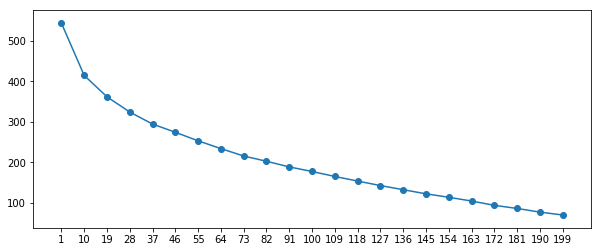

In [193]:
k_to_squared = []
k_range = range(1, 201, 9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(np.nan_to_num(cs1.pairwise_pmi, 0))
    k_to_squared.append((k, kmeans.inertia_))
    
x = [ks[0] for ks in sorted(k_to_squared)]
y = [ks[1] for ks in sorted(k_to_squared)]
   
plt.figure(figsize=(10, 4))
ax = plt.axes()
ax.set_xticks(tuple(k_range))
plt.plot(x, y)
plt.scatter(x, y)

### clusters with k=10

In [196]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(np.nan_to_num(cs1.pairwise_pmi, 0))

cglossed = pd.DataFrame(kmeans.labels_, 
                           index=[f'{F.lex.v(ce1.target2lex[w])}.{F.vs.v(ce1.target2node[w])} -- {ce1.target2gloss[w]}' for w in cs1.raw.columns], 
                           columns=['cluster']).fillna(0)

clustmin = pd.DataFrame(kmeans.labels_, 
                        index=cs1.raw.columns, 
                        columns=['cluster']).fillna(0)

gloss_to_lex = dict(zip(cglossed.index, clustmin.index))

#### Size of clusters:

In [197]:
clustmin.cluster.value_counts()

1    125
7     45
0     27
4     24
2     21
9     16
5     15
6     12
3     12
8     11
Name: cluster, dtype: int64

#### Cluster Profiles

In [203]:
for cname in cglossed.cluster.unique():
    
    cluster = cglossed[cglossed.cluster == cname]
    lexs = [lex.split()[0] for lex in cluster.index]
    
    
    print(f'CLUSTER {cname}')
    print(cluster.shape)
    print(cluster)
    print()
    print('TOP ARGUMENTS:')
    print(cs1.raw[lexs].sum(axis=1).sort_values(ascending=False).head(10))
    print()
    print('-'*40)

CLUSTER 7
(45, 1)
                              cluster
<BD[.qal -- work, serve             7
<MD[.hif -- stand                   7
<NH[.qal -- answer                  7
<ZB[.qal -- leave                   7
<ZR[.qal -- help                    7
>BD[.piel -- perish                 7
>SR[.qal -- bind                    7
BRK[.piel -- bless                  7
C>L[.qal -- ask                     7
CB<[.hif -- swear                   7
CMR[.qal -- keep                    7
CPV[.qal -- judge                   7
CXV[.qal -- slaughter               7
DBQ[.hif -- cling, cleave to        7
DRC[.qal -- inquire                 7
FRP[.qal -- burn                    7
GDL[.piel -- be strong              7
JD<[.qal -- know                    7
JLD[.hif -- bear                    7
JLD[.qal -- bear                    7
JYQ[.qal -- pour                    7
K<S[.hif -- be discontent           7
KSH[.piel -- cover                  7
KWN[.hif -- be firm                 7
LKD[.qal -- seize               